#### Pobieranie danych i wstępne przetwarzanie

In [131]:
import pandas as pd

#skipps row with units
datafile = 'Statystyki z lat 2000-2023.xlsx'
df = pd.read_excel(datafile, sheet_name='PM2,5', skiprows=[1])

#filters from data rows with 'Czas uśredniania' == '24g' and 'Rok' between 2010 and 2023
df = df[(df['Czas uśredniania'] == '24g') & (df['Rok'].between(2010, 2023))]

#### Wykres liniowy przedstawiający zmianę średniego stężenia PM2,5 w czasie dla dwóch wybranych stacji pomiarowych

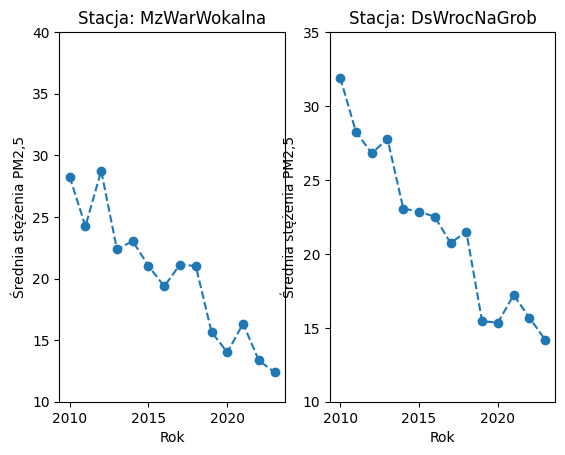

In [132]:
import matplotlib.pyplot as plt

station_name1 = "MzWarWokalna"
station_name2 = "DsWrocNaGrob"

station1_data = df[df['Kod stacji'] == station_name1]
station2_data = df[df['Kod stacji'] == station_name2]

plt.subplot(1, 2, 1)
plt.plot(station1_data['Rok'], station1_data['Średnia'], marker='o', linestyle='dashed')
plt.xlabel('Rok')
plt.ylabel('Średnia stężenia PM2,5')
plt.ylim(10,40)
plt.title('Stacja: ' + station_name1)

plt.subplot(1, 2, 2)
plt.plot(station2_data['Rok'], station2_data['Średnia'], marker='o', linestyle='dashed')
plt.xlabel('Rok')
plt.ylabel('Średnia stężenia PM2,5')
plt.ylim(10,35)
plt.title('Stacja: ' + station_name2)

plt.show()

Obie stacje pomiarowe obserwują znaczny spadek poziomu stężenia PM2,5.
Jednak na stacji DsWrocNaGrob obserwujemy większe wartości niż na stacji MzWarWokalna.

#### Wykres pudełkowy przedstawiający rozkład średnich stężeń PM2,5 dla wszystkich stacji pomiarowych w Polsce

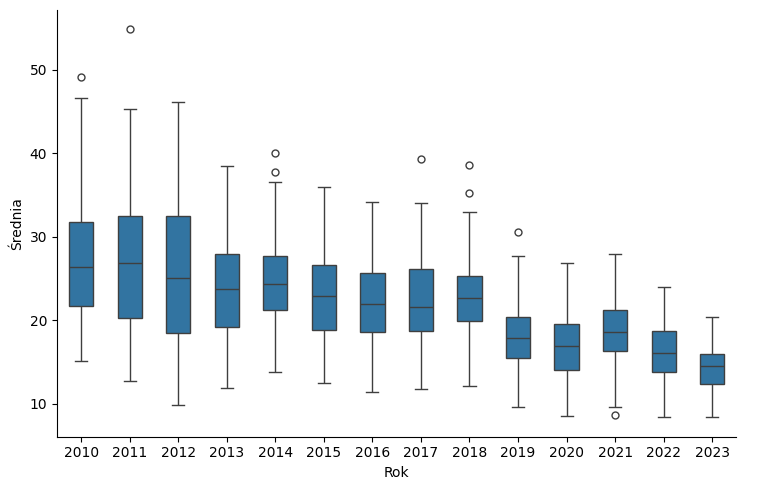

In [133]:
import seaborn as sns

sns.catplot(data=df, kind="box", x="Rok", y="Średnia", aspect=1.5, width=0.5)
plt.show()

Od 2010 roku obserwujemy spadek średnich stężeń PM2,5 w Polsce.
Maleje również rozrzut wartości.

#### Wykres słupkowy porównujący między województwami liczbę przekroczeń normy stężenia PM2,5 w latach 2010-2023

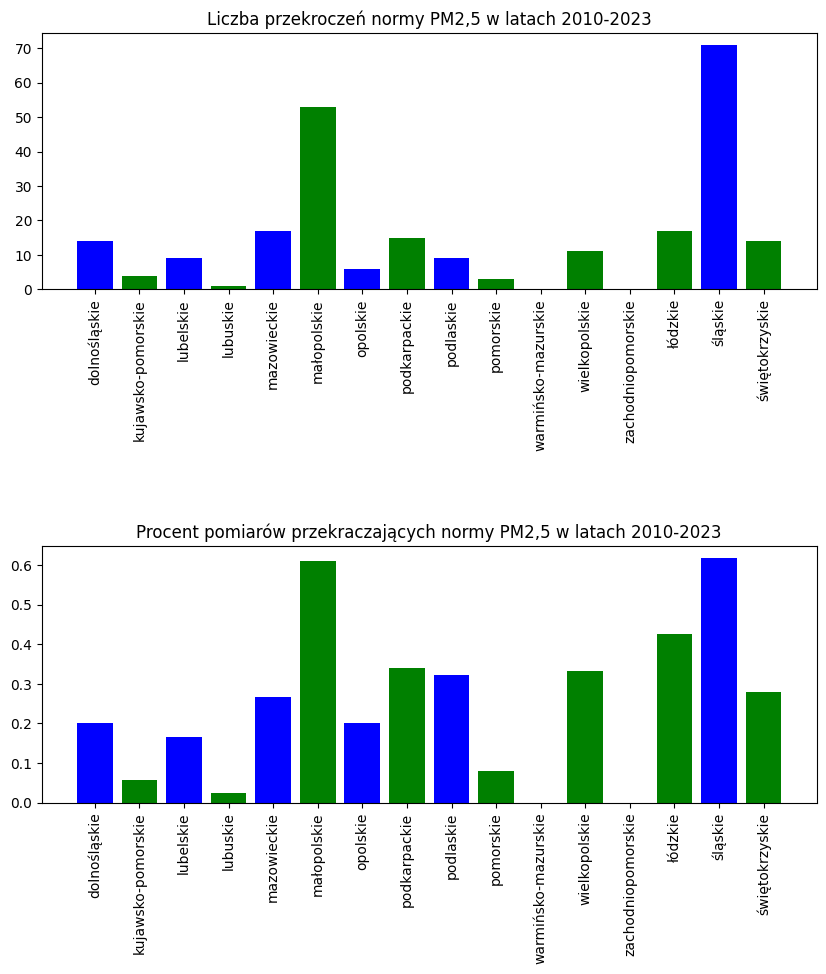

In [134]:
num_of_violations = df.groupby('Województwo')['Średnia'].agg(lambda x: (x > 25).sum())
frac_of_violations = df.groupby('Województwo')['Średnia'].agg(lambda x: (x > 25).sum() / len(x))

plt.figure(figsize=(10, 10))

plt.subplot(2, 1, 1)
plt.bar(num_of_violations.index, num_of_violations, color = ['blue', 'green'])
plt.xticks(rotation=90)
plt.title('Liczba przekroczeń normy PM2,5 w latach 2010-2023')

plt.subplot(2, 1, 2)
plt.bar(frac_of_violations.index, frac_of_violations, color = ['blue', 'green'])
plt.xticks(rotation=90)
plt.title('Procent pomiarów przekraczających normy PM2,5 w latach 2010-2023')

plt.subplots_adjust(hspace=1)  # Adjust the height space between subplots

plt.show()



Najwięcej przekroczeń występuje w województwach z dużymi ośrodkami miejskimi lub przemysłowymi.
Kiedy jednak spojrzymy na procent pomiarów przekraczających normy zauważymy zdecydowanie mniejszą różnicę między województwami - prawdopodobnie w miastach w których poziom zanieczyszczeń jest wyższy prowadzone jest więcej pomiarów.